In [ ]:
from __future__ import print_function
import keras as k
import os
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from google.colab import files


In [ ]:
#CNN1
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras import utils as np_utils

batch_size = 128
num_classes = 10
epochs = 50

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")



mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std


y_train = k.utils.np_utils.to_categorical(y_train, num_classes)
y_test = k.utils.np_utils.to_categorical(y_test, num_classes)

170508288/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
from keras.layers.advanced_activations import LeakyReLU
#I CNN1-Baseline
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(32,32,3),
                 padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),
                 input_shape=(32,32,3),
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001,momentum=0.9)
model.compile(loss=k.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 16384)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               4194560   
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 3s 11ms/step - loss: 1.7678 - accuracy: 0.3735 - val_loss: 1.5754 - val_accuracy: 0.4525
Epoch 2/50
274/274 [==============================] - 3s 10ms/step - loss: 1.4943 - accuracy: 0.4826 - val_loss: 1.4611 - val_accuracy: 0.4846
Epoch 3/50
274/274 [==============================] - 3s 10ms/step - loss: 1.3664 - accuracy: 0.5252 - val_loss: 1.3569 - val_accuracy: 0.5288
Epoch 4/50
274/274 [==============================] - 3s 10ms/step - loss: 1.2613 - accuracy: 0.5630 - val_loss: 1.2741 - val_accuracy: 0.5541
Epoch 5/50
274/274 [==============================] - 3s 10ms/step - loss: 1.1692 - accuracy: 0.5948 - val_loss: 1.2327 - val_accuracy: 0.5691
Epoch 6/50
274/274 [==============================] - 3s 10ms/step - loss: 1.0962 - accuracy: 0.6207 - val_loss: 1.1780 - val_accuracy: 0.5917
Epoch 7/50
274/274 [==============================] - 3s 13ms/step - loss: 1.0313 - accuracy: 0.6444 - val_loss: 1.1582 - val_accuracy: 0.5981

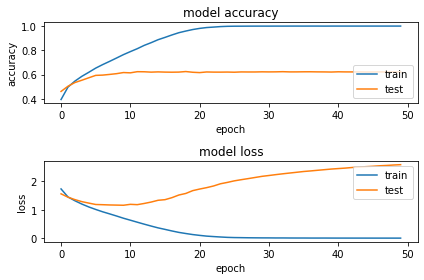

In [ ]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[699  20  52  16  26  14  15  11  92  55]
 [ 30 708  17  19   5  14  12   7  51 137]
 [ 79   9 505  65  99  88  76  48  19  12]
 [ 22  20 107 416  71 179  80  52  22  31]
 [ 29   6 117  74 569  48  58  79   9  11]
 [ 15   8  96 188  63 500  42  68  14   6]
 [ 10  10  60  66  76  39 708  13   9   9]
 [ 21   5  45  56  73  96   9 671   3  21]
 [ 81  48  17  18  15  14   8   5 760  34]
 [ 44 146  17  21  12  10  17  30  39 664]]


In [ ]:
import numpy as np
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

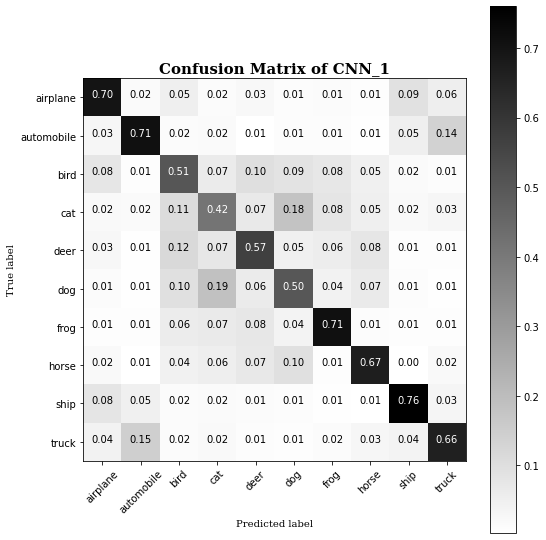

In [ ]:
# Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN_1')

In [ ]:
model.evaluate(x_test, y_test, batch_size=128, verbose=1)

79/79 [==============================] - 0s 5ms/step - loss: 2.6034 - accuracy: 0.6200


[2.6033971309661865, 0.6200000047683716]

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
#I CNN2-
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(32,32,3),
                 padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss=k.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 5s 15ms/step - loss: 2.0449 - accuracy: 0.2554 - val_loss: 1.7764 - val_accuracy: 0.3865
Epoch 2/50
274/274 [==============================] - 4s 13ms/step - loss: 1.7434 - accuracy: 0.3722 - val_loss: 1.5691 - val_accuracy: 0.4511
Epoch 3/50
274/274 [==============================] - 4s 13ms/step - loss: 1.5890 - accuracy: 0.4257 - val_loss: 1.4610 - val_accuracy: 0.4871
Epoch 4/50
274/274 [==============================] - 4s 13ms/step - loss: 1.4954 - accuracy: 0.4593 - val_loss: 1.3839 - val_accuracy: 0.5174
Epoch 5/50
274/274 [==============================] - 4s 13ms/step - loss: 1.4240 - accuracy: 0.4875 - val_loss: 1.3429 - val_accuracy: 0.5294
Epoch 6/50
274/274 [==============================] - 3s 13ms/step - loss: 1.3672 - accuracy: 0.5127 - val_loss: 1.2607 - val_accuracy: 0.5548
Epoch 7/50
274/274 [==============================] - 3s 13ms/step - loss: 1.3148 - accuracy: 0.5313 - val_loss: 1.2152 - val_accuracy: 0.5757

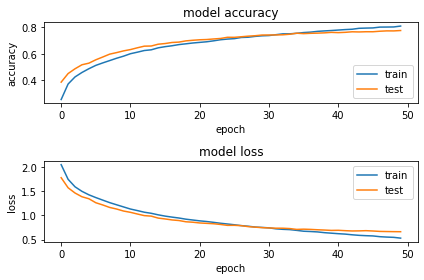

In [ ]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

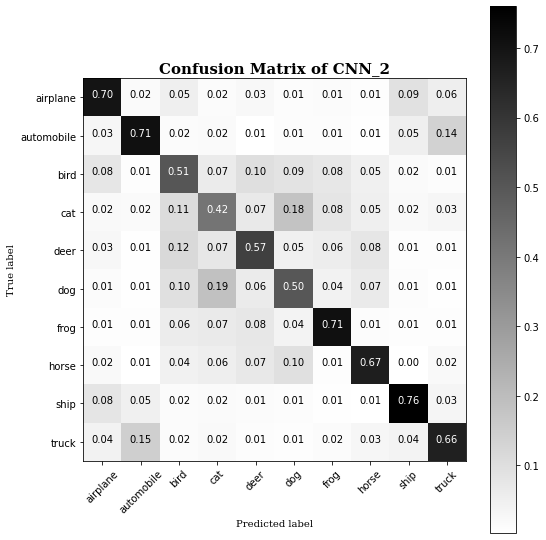

In [ ]:
import numpy as np
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    # Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN_2')

In [ ]:
model.evaluate(x_test, y_test, batch_size=128, verbose=1)

79/79 [==============================] - 1s 7ms/step - loss: 0.6682 - accuracy: 0.7738


[0.6681628227233887, 0.7738000154495239]

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
#I CNN3-
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 input_shape=(32,32,3),
                 padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss=k.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 conv2d_71 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_64 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_72 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 7s 24ms/step - loss: 2.0982 - accuracy: 0.2217 - val_loss: 1.8896 - val_accuracy: 0.3489
Epoch 2/50
274/274 [==============================] - 6s 24ms/step - loss: 1.8268 - accuracy: 0.3349 - val_loss: 1.6783 - val_accuracy: 0.4027
Epoch 3/50
274/274 [==============================] - 6s 22ms/step - loss: 1.6797 - accuracy: 0.3859 - val_loss: 1.5617 - val_accuracy: 0.4477
Epoch 4/50
274/274 [==============================] - 6s 24ms/step - loss: 1.5806 - accuracy: 0.4221 - val_loss: 1.4641 - val_accuracy: 0.4778
Epoch 5/50
274/274 [==============================] - 6s 22ms/step - loss: 1.5026 - accuracy: 0.4531 - val_loss: 1.3890 - val_accuracy: 0.5065
Epoch 6/50
274/274 [==============================] - 6s 23ms/step - loss: 1.4436 - accuracy: 0.4767 - val_loss: 1.3607 - val_accuracy: 0.5161
Epoch 7/50
274/274 [==============================] - 6s 22ms/step - loss: 1.3875 - accuracy: 0.4996 - val_loss: 1.2790 - val_accuracy: 0.5446

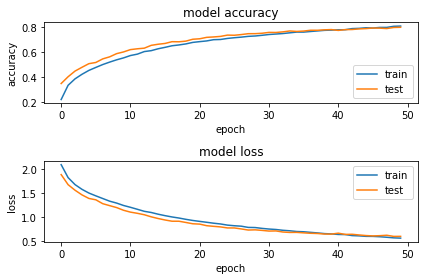

In [ ]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

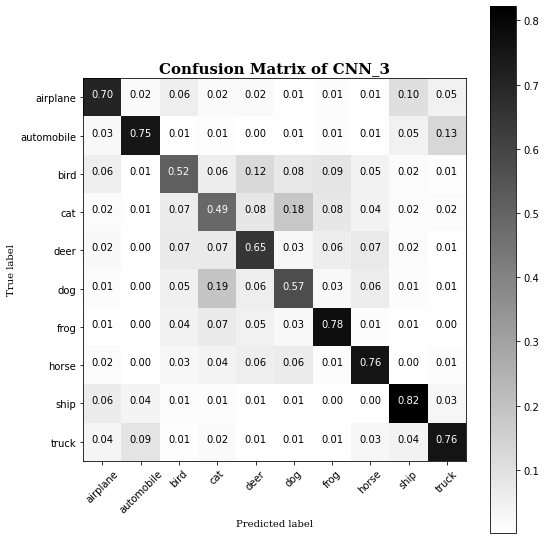

In [ ]:
import numpy as np
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    # Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN_3')

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
#I CNN3-
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 input_shape=(32,32,3),
                 padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(0.1))


model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss=k.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 conv2d_83 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_85 (Conv2D)          (None, 16, 16, 128)       73856     
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 7s 23ms/step - loss: 1.9343 - accuracy: 0.3085 - val_loss: 1.6611 - val_accuracy: 0.4087
Epoch 2/50
274/274 [==============================] - 6s 22ms/step - loss: 1.5313 - accuracy: 0.4515 - val_loss: 1.4725 - val_accuracy: 0.4655
Epoch 3/50
274/274 [==============================] - 6s 22ms/step - loss: 1.3582 - accuracy: 0.5176 - val_loss: 1.3464 - val_accuracy: 0.5265
Epoch 4/50
274/274 [==============================] - 6s 22ms/step - loss: 1.2379 - accuracy: 0.5632 - val_loss: 1.2342 - val_accuracy: 0.5679
Epoch 5/50
274/274 [==============================] - 6s 22ms/step - loss: 1.1327 - accuracy: 0.6018 - val_loss: 1.1261 - val_accuracy: 0.6087
Epoch 6/50
274/274 [==============================] - 6s 23ms/step - loss: 1.0417 - accuracy: 0.6393 - val_loss: 1.1017 - val_accuracy: 0.6206
Epoch 7/50
274/274 [==============================] - 6s 23ms/step - loss: 0.9539 - accuracy: 0.6697 - val_loss: 1.0210 - val_accuracy: 0.6480

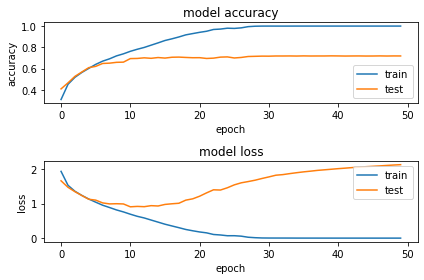

In [ ]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
#I CNN3-
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(32,32,3),
                 padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss=k.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_95 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_53 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_76 (Dropout)        (None, 16, 16, 64)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 7s 24ms/step - loss: 2.0648 - accuracy: 0.3386 - val_loss: 2.5913 - val_accuracy: 0.2209
Epoch 2/50
274/274 [==============================] - 7s 24ms/step - loss: 1.5193 - accuracy: 0.4633 - val_loss: 1.5951 - val_accuracy: 0.4367
Epoch 3/50
274/274 [==============================] - 6s 23ms/step - loss: 1.3316 - accuracy: 0.5282 - val_loss: 1.2867 - val_accuracy: 0.5437
Epoch 4/50
274/274 [==============================] - 7s 24ms/step - loss: 1.2132 - accuracy: 0.5720 - val_loss: 1.1881 - val_accuracy: 0.5867
Epoch 5/50
274/274 [==============================] - 6s 23ms/step - loss: 1.1223 - accuracy: 0.6029 - val_loss: 1.0931 - val_accuracy: 0.6189
Epoch 6/50
274/274 [==============================] - 6s 23ms/step - loss: 1.0604 - accuracy: 0.6255 - val_loss: 1.0181 - val_accuracy: 0.6463
Epoch 7/50
274/274 [==============================] - 6s 23ms/step - loss: 1.0043 - accuracy: 0.6461 - val_loss: 0.9860 - val_accuracy: 0.6570

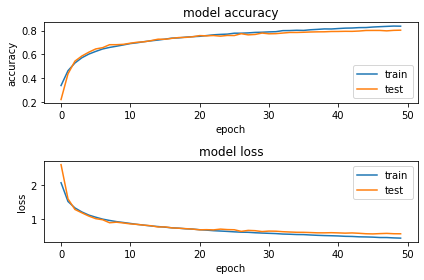

In [ ]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [ ]:
# Layers definitions
from keras import backend as K
for l in range(len(model.layers)):
    print(l, model.layers[l])

0 <keras.layers.convolutional.Conv2D object at 0x7f2a3c7129d0>
1 <keras.layers.convolutional.Conv2D object at 0x7f2ac66af690>
2 <keras.layers.advanced_activations.LeakyReLU object at 0x7f2ac62e7fd0>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f2b16151810>
4 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f2b321d4590>
5 <keras.layers.core.dropout.Dropout object at 0x7f2b32308850>
6 <keras.layers.convolutional.Conv2D object at 0x7f2b321b2c50>
7 <keras.layers.convolutional.Conv2D object at 0x7f2b326228d0>
8 <keras.layers.advanced_activations.LeakyReLU object at 0x7f2b32622b50>
9 <keras.layers.pooling.MaxPooling2D object at 0x7f2b32640690>
10 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f2c70418290>
11 <keras.layers.core.dropout.Dropout object at 0x7f2b3263e350>
12 <keras.layers.convolutional.Conv2D object at 0x7f2b3262c5d0>
13 <keras.layers.convolutional.Conv2D object at 0x7f2b3262f050>
14 <keras.layers.advanced_acti

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
#I CNN3-
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(32,32,3),
                 padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss=k.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()
model_log=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)

model.pop() # this will remove the last layer
model.summary() # check the network 

feature_mapping = model(X) 

from sklearn import svm

clf = svm.SVC()
clf.fit(feature_mapings, y)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 64)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
274/274 [==============================] - 17s 26ms/step - loss: 2.0687 - accuracy: 0.3350 - val_loss: 1.9541 - val_accuracy: 0.3032
Epoch 2/50
274/274 [==============================] - 7s 24ms/step - loss: 1.5321 - accuracy: 0.4571 - val_loss: 1.4208 - val_accuracy: 0.4973
Epoch 3/50
274/274 [==============================] - 6s 22ms/step - loss: 1.3514 - accuracy: 0.5191 - val_loss: 1.2981 - val_accuracy: 0.5407
Epoch 4/50
274/274 [==============================] - 6s 24ms/step - loss: 1.2326 - accuracy: 0.5631 - val_loss: 1.1693 - val_accuracy: 0.5833
Epoch 5/50
274/274 [==============================] - 6s 22ms/step - loss: 1.1534 - accuracy: 0.5922 - val_loss: 1.0913 - val_accuracy: 0.6152
Epoch 6/50
274/274 [==============================] - 7s 24ms/step - loss: 1.0971 - accuracy: 0.6097 - val_loss: 1.0795 - val_accuracy: 0.6228
Epoch 7/50
274/274 [==============================] - 6s 22ms/step - loss: 1.0477 - accuracy: 0.6291 - val_loss: 1.0629 - val_accuracy: 0.627

NameError: ignored

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
#I CNN4-
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(32,32,3),
                 padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(256, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(512, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(1024, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss=k.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Total params: 13,627,658
Trainable params: 13,623,690
Non-trainable params: 3,968
_________________________________________________________________


In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 12s 38ms/step - loss: 1.8942 - accuracy: 0.3616 - val_loss: 2.6430 - val_accuracy: 0.2151
Epoch 2/50
274/274 [==============================] - 9s 32ms/step - loss: 1.4369 - accuracy: 0.4784 - val_loss: 1.3906 - val_accuracy: 0.5105
Epoch 3/50
274/274 [==============================] - 8s 31ms/step - loss: 1.2754 - accuracy: 0.5401 - val_loss: 1.2230 - val_accuracy: 0.5649
Epoch 4/50
274/274 [==============================] - 8s 31ms/step - loss: 1.1603 - accuracy: 0.5837 - val_loss: 1.1201 - val_accuracy: 0.6075
Epoch 5/50
274/274 [==============================] - 9s 31ms/step - loss: 1.0767 - accuracy: 0.6177 - val_loss: 0.9987 - val_accuracy: 0.6487
Epoch 6/50
274/274 [==============================] - 8s 30ms/step - loss: 1.0050 - accuracy: 0.6416 - val_loss: 1.0374 - val_accuracy: 0.6395
Epoch 7/50
274/274 [==============================] - 8s 30ms/step - loss: 0.9451 - accuracy: 0.6653 - val_loss: 0.8913 - val_accuracy: 0.687

In [ ]:
model.evaluate(x_test, y_test, batch_size=128, verbose=1)

79/79 [==============================] - 1s 12ms/step - loss: 0.6502 - accuracy: 0.8169


[0.6501638293266296, 0.8169000148773193]

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_val = model.predict(x_test)
predicted_val = np.argmax(predicted_val, axis=1)
true_val = np.argmax(y_test, axis=1)
confusion_matrix = confusion_matrix(true_val, predicted_val)

In [ ]:
errors = (predicted_val - true_val !=0)
total_errors = sum(errors)
print(total_errors)
errors_index = np.where(errors==True)
true_value_labels = true_val[errors_index]
pred_value_labels = predicted_val[errors_index]
X_val_errors = x_test[errors_index]

1831


In [ ]:
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[807  12  28  12  16   4   9   6  67  39]
 [  7 890   2   2   1   4   5   0  23  66]
 [ 49   1 693  31  87  52  56  19   7   5]
 [ 13   2  46 636  64 135  54  27   8  15]
 [  4   2  34  33 840  20  38  24   4   1]
 [  5   2  28 142  49 718  17  33   2   4]
 [  2   1  17  34  17  18 903   3   2   3]
 [  8   0  12  21  44  35   6 861   4   9]
 [ 29  11   2   9   3   2   5   3 916  20]
 [  7  48   1   3   3   1   2  10  20 905]]


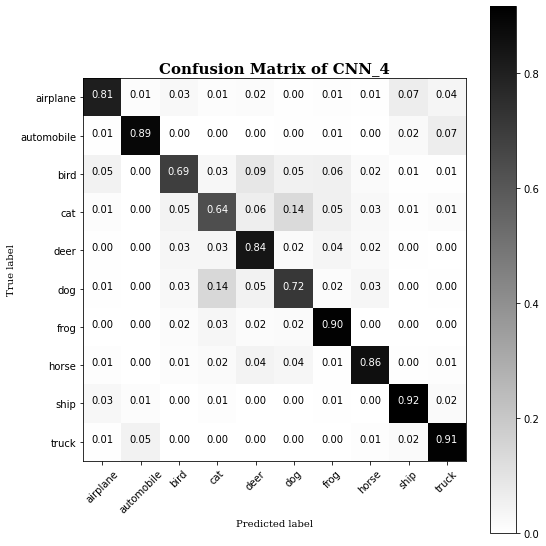

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    # Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN_4')

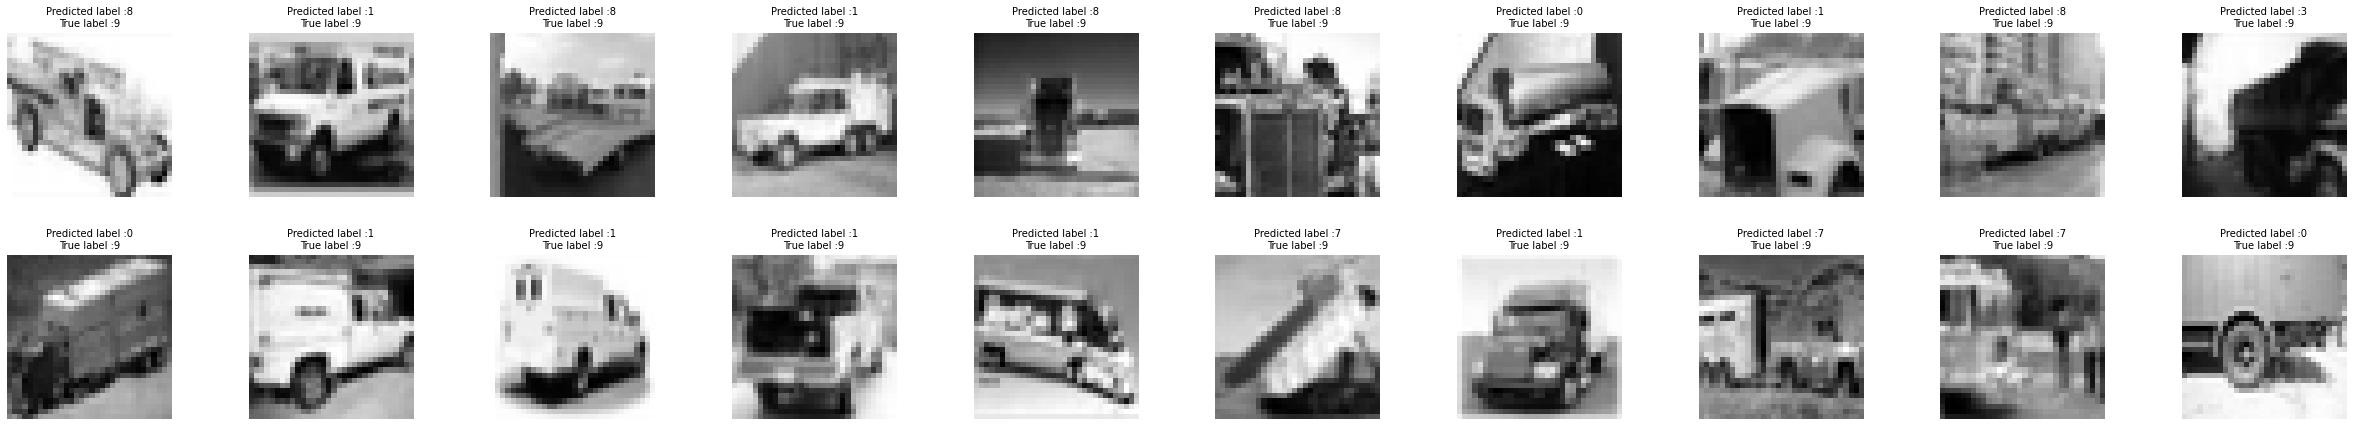

In [ ]:
plt.figure(figsize=(30, 30))

j=0
for i in range(1000,1500):
  if true_value_labels[i]==9 :
    plt.subplot(10,10,j+1)
    plt.subplots_adjust(left=-0.2,
                    bottom=-0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
    j+=1
    plt.imshow(X_val_errors[i,:,:,0],'gray')
    plt.title("Predicted label :{}\nTrue label :{}".format(pred_value_labels[i],true_value_labels[i]),fontsize=10)
    plt.axis('off')

        


In [ ]:
from keras.layers.advanced_activations import LeakyReLU
#I CNN5-
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(32,32,3),
                 padding='same'))
model.add(Conv2D(64, kernel_size=(5, 5),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(128, kernel_size=(5, 5),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(256, kernel_size=(5, 5),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(256, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(512, kernel_size=(5, 5),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(512, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(1024, kernel_size=(5, 5),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))




In [ ]:

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss=k.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Non-trainable params: 3,968
_________________________________________________________________


In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 35s 81ms/step - loss: 1.8694 - accuracy: 0.3571 - val_loss: 3.1153 - val_accuracy: 0.1729
Epoch 2/50
274/274 [==============================] - 21s 77ms/step - loss: 1.4540 - accuracy: 0.4729 - val_loss: 1.6041 - val_accuracy: 0.4681
Epoch 3/50
274/274 [==============================] - 21s 77ms/step - loss: 1.2804 - accuracy: 0.5403 - val_loss: 1.3099 - val_accuracy: 0.5514
Epoch 4/50
274/274 [==============================] - 21s 77ms/step - loss: 1.1402 - accuracy: 0.5945 - val_loss: 1.0752 - val_accuracy: 0.6218
Epoch 5/50
274/274 [==============================] - 21s 77ms/step - loss: 1.0414 - accuracy: 0.6299 - val_loss: 1.0073 - val_accuracy: 0.6442
Epoch 6/50
274/274 [==============================] - 21s 77ms/step - loss: 0.9604 - accuracy: 0.6593 - val_loss: 0.9155 - val_accuracy: 0.6803
Epoch 7/50
274/274 [==============================] - 23s 86ms/step - loss: 0.8987 - accuracy: 0.6844 - val_loss: 0.8824 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test, batch_size=128, verbose=1)

79/79 [==============================] - 2s 25ms/step - loss: 0.8116 - accuracy: 0.8136


[0.8115994334220886, 0.8136000037193298]

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_val = model.predict(x_test)
predicted_val = np.argmax(predicted_val, axis=1)
true_val = np.argmax(y_test, axis=1)
confusion_matrix = confusion_matrix(true_val, predicted_val)

In [ ]:
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[833   9  26  18  12   6   8   7  57  24]
 [ 13 858   1   2   1   2  10   3  38  72]
 [ 47   0 718  34  75  52  50  15   5   4]
 [ 18   2  29 648  66 144  60  19   7   7]
 [ 11   1  32  35 842  22  24  27   5   1]
 [  7   3  22 148  37 716  21  38   5   3]
 [  3   3  19  44  26  18 881   0   3   3]
 [  8   2  21  23  49  46   6 838   1   6]
 [ 34   3   8   7   2   1   4   5 919  17]
 [ 20  28   6   5   3   1   5   3  28 901]]


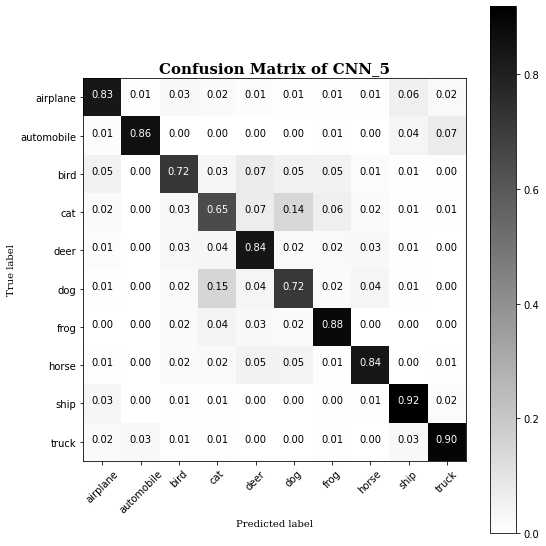

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    # Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of CNN_5')

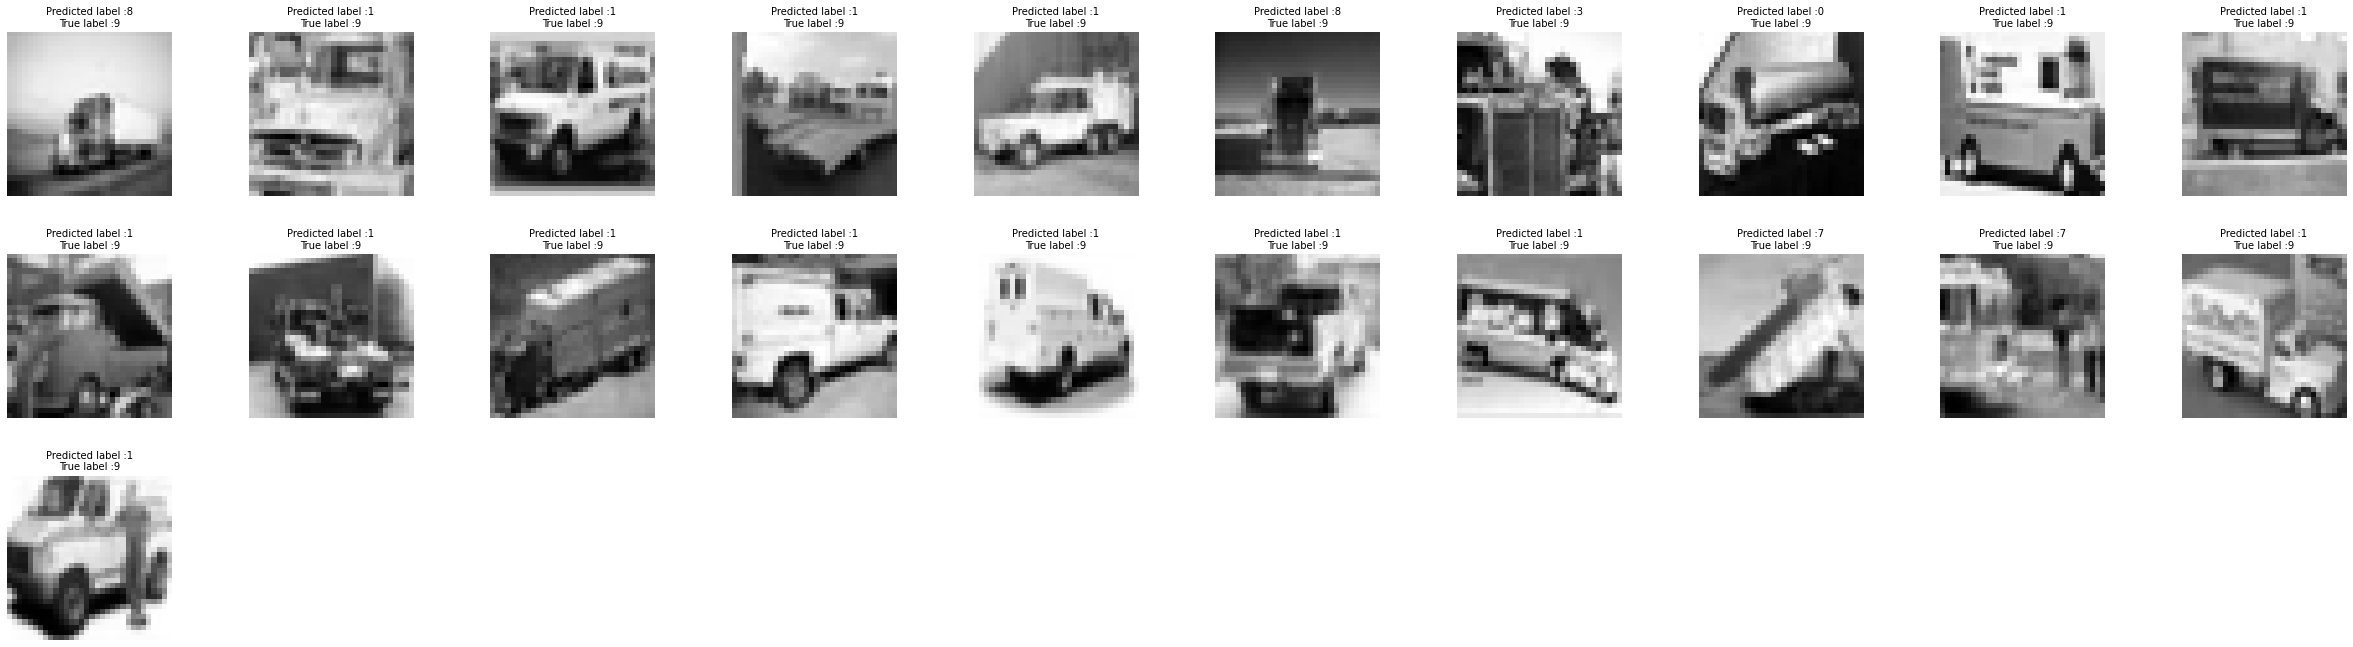

In [ ]:
plt.figure(figsize=(30, 30))

j=0
for i in range(1000,1500):
  if true_value_labels[i]==9 :
    plt.subplot(10,10,j+1)
    plt.subplots_adjust(left=-0.2,
                    bottom=-0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
    j+=1
    plt.imshow(X_val_errors[i,:,:,0],'gray')
    plt.title("Predicted label :{}\nTrue label :{}".format(pred_value_labels[i],true_value_labels[i]),fontsize=10)
    plt.axis('off')

        


In [ ]:
y_train.shape

(50000, 10)

In [ ]:
# class label list
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# example image for each class
images_dict = dict()
for i, l in enumerate(y_train):
  if len(images_dict)==10:
    break
  if l not in images_dict.keys():
    images_dict[l] = x_train[i].reshape((32, 32,3))
images_dict = dict(sorted(images_dict.items()))
    
# example image for each class for test set
x_test_dict = dict()
for i, l in enumerate(y_test):
  if len(x_test_dict)==10:
    break
  if l not in x_test_dict.keys():
    x_test_dict[l] = x_test[i]
# order by class
x_test_each_class = [x_test_dict[i] for i in sorted(x_test_dict)]
x_test_each_class = np.asarray(x_test_each_class)
# Compute predictions
predictions = model.predict(x_test_each_class)
predicted_class = np.argmax(predictions, axis=1)

TypeError: ignored